<a href="https://colab.research.google.com/github/YeisonABL/COVID-19-con-python-2.0/blob/master/Covid_19_bogota_casos_acumuladosMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
bogota = pd.read_csv('bogota.csv')
bogota

,FECHA_DIAGNOSTICO,CASO,CASOS_ACUMULADOS,RECUPERADO,RECUPERADOS_ACUMULADOS,FALLECIDOS,FALLECIDOS_ACUMULADOS
0,2020-03-06,1,1,1,1,0,0
1,2020-03-07,0,1,0,1,0,0
2,2020-03-08,0,1,0,1,0,0
3,2020-03-09,0,1,0,1,0,0
4,2020-03-10,2,3,2,3,0,0
...,...,...,...,...,...,...,...
678,2022-01-13,8075,1565063,168,1484374,5,27949
679,2022-01-14,7942,1573005,174,1484548,1,27950
680,2022-01-15,6754,1579759,235,1484783,7,27957
681,2022-01-16,5333,1585092,31,1484814,2,27959


In [3]:
bogota_cases = bogota.drop(['CASO', 'RECUPERADO', 'RECUPERADOS_ACUMULADOS','FALLECIDOS','FALLECIDOS_ACUMULADOS'],axis=1)
bogota_cases

,FECHA_DIAGNOSTICO,CASOS_ACUMULADOS
0,2020-03-06,1
1,2020-03-07,1
2,2020-03-08,1
3,2020-03-09,1
4,2020-03-10,3
...,...,...
678,2022-01-13,1565063
679,2022-01-14,1573005
680,2022-01-15,1579759
681,2022-01-16,1585092


In [4]:
bogota_cases.set_index('FECHA_DIAGNOSTICO', inplace = True)
bogota_cases

,CASOS_ACUMULADOS
FECHA_DIAGNOSTICO,
2020-03-06,1
2020-03-07,1
2020-03-08,1
2020-03-09,1
2020-03-10,3
...,...
2022-01-13,1565063
2022-01-14,1573005
2022-01-15,1579759


In [5]:
train = bogota_cases[:138]
train

,CASOS_ACUMULADOS
FECHA_DIAGNOSTICO,
2020-03-06,1
2020-03-07,1
2020-03-08,1
2020-03-09,1
2020-03-10,3
...,...
2020-07-17,63192
2020-07-18,65655
2020-07-19,68127


In [6]:
test = bogota_cases[138:138+14]
test

,CASOS_ACUMULADOS
FECHA_DIAGNOSTICO,
2020-07-22,77437
2020-07-23,79880
2020-07-24,83604
2020-07-25,86717
2020-07-26,89002
2020-07-27,92710
2020-07-28,96653
2020-07-29,99736
2020-07-30,103354


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [9]:
train_scaled =scaler.transform(train)
test_scaled = scaler.transform(test)

In [10]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [11]:
window_size= 30
n_features= 1
batch_size = 1
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length= window_size, batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train))
print("Total number of samples in the generated data = ", len(train_generator))

Total number of samples in the original training data =  138
Total number of samples in the generated data =  108


In [12]:
x_train, y_train = train_generator[0]
x_train.shape
y_train.shape

(1, 1)

In [13]:
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=len(test)-1 ,batch_size=batch_size)
print("Total number of samples in the original training data = ", len(test))
print("Total number of sambles in the generated data", len(test_generator))

Total number of samples in the original training data =  14
Total number of sambles in the generated data 1


In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import RootMeanSquaredError

In [15]:
model3 = Sequential()
model3.add(Dense(3, activation='relu', input_shape=(window_size, n_features)))
model3.add(Dense(1, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error',metrics=[RootMeanSquaredError()])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30, 3)             6         
                                                                 
 dense_1 (Dense)             (None, 30, 1)             4         
                                                                 
 dense_2 (Dense)             (None, 30, 1)             2         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [16]:
history3=model3.fit(train_generator, validation_data = test_generator, epochs=100)

Epoch 1/100
108/108 [==============================] - 1s 4ms/step - loss: 0.1242 - root_mean_squared_error: 0.3524 - val_loss: 2.7276 - val_root_mean_squared_error: 1.6515
Epoch 2/100
108/108 [==============================] - 0s 2ms/step - loss: 0.1209 - root_mean_squared_error: 0.3477 - val_loss: 2.7053 - val_root_mean_squared_error: 1.6448
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 0.1178 - root_mean_squared_error: 0.3432 - val_loss: 2.6826 - val_root_mean_squared_error: 1.6379
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 0.1148 - root_mean_squared_error: 0.3389 - val_loss: 2.6602 - val_root_mean_squared_error: 1.6310
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 0.1120 - root_mean_squared_error: 0.3347 - val_loss: 2.6398 - val_root_mean_squared_error: 1.6247
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 0.1094 - root_mean_squared_error: 0.3307 - val_loss: 2.6179 

In [17]:
loss_MLP = history3.history['loss']
val_loss_MLP = history3.history['val_loss']
epochs = range(1,len(loss_MLP)+1)

In [18]:
import matplotlib.pyplot as plt

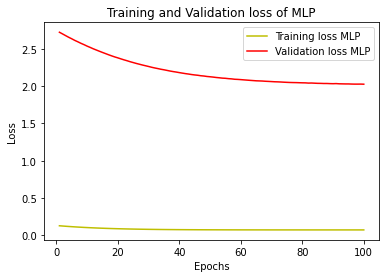

In [19]:
plt.plot(epochs, loss_MLP, 'y',label='Training loss MLP')
plt.plot(epochs, val_loss_MLP, 'r',label='Validation loss MLP')
plt.title('Training and Validation loss of MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
predictions_MLP = []
future=5
first_eval_batch = train_scaled[-window_size:]
current_batch = first_eval_batch.reshape((1, window_size, n_features))

for i in range(future):
    
    # get the prediction value for the first batch
    current_pred_MLP = model3.predict(current_batch)[0]
    
    # append the prediction into the array
    predictions_MLP.append(current_pred_MLP) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred_MLP]],axis=1)

ValueError: ignored

In [22]:
predictions_actual_scale_MLP = scaler.inverse_transform(predictions_MLP)

ValueError: ignored

In [23]:
test_prediction_MLP=model3.predict(test_scaled)

In [24]:
test_prediction_data_actual_scale_MLP= scaler.inverse_transform(test_prediction_MLP)

ValueError: ignored